##Boom bikes linear regression assignment.

**Problem statement**
  * A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a 'dock' which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


  * A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


  * In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


  * They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

  * Which variables are significant in predicting the demand for shared bikes How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


**Business Goal:**

  You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

##Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bikes = pd.read_csv('/content/day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null or empty data in the set.

** Data Preparation **

As given in the statement, some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them. We can convert these into categorical string values.

In [7]:
season_map = {1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' }
weather_map={1: 'Clear, Partly Cloudy',2:'Misty, Cloudy sky',3:'Light Snow or Rain',4:'Heavy Rain, Snow and Fog'}
days_map={0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

bikes['season']=bikes.season.map(season_map)
bikes['mnth']=bikes.mnth.map(month_map)
bikes['weathersit']=bikes.weathersit.map(weather_map)
bikes['weekday']=bikes.weekday.map(days_map)

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,"Misty, Cloudy sky",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,"Misty, Cloudy sky",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,"Clear, Partly Cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,"Clear, Partly Cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,"Clear, Partly Cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

Let's run some tests to see if there are some multicollinearity going on.

We'll visualise our data using matplotlib and seaborn.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Running pair plot on numeric variables

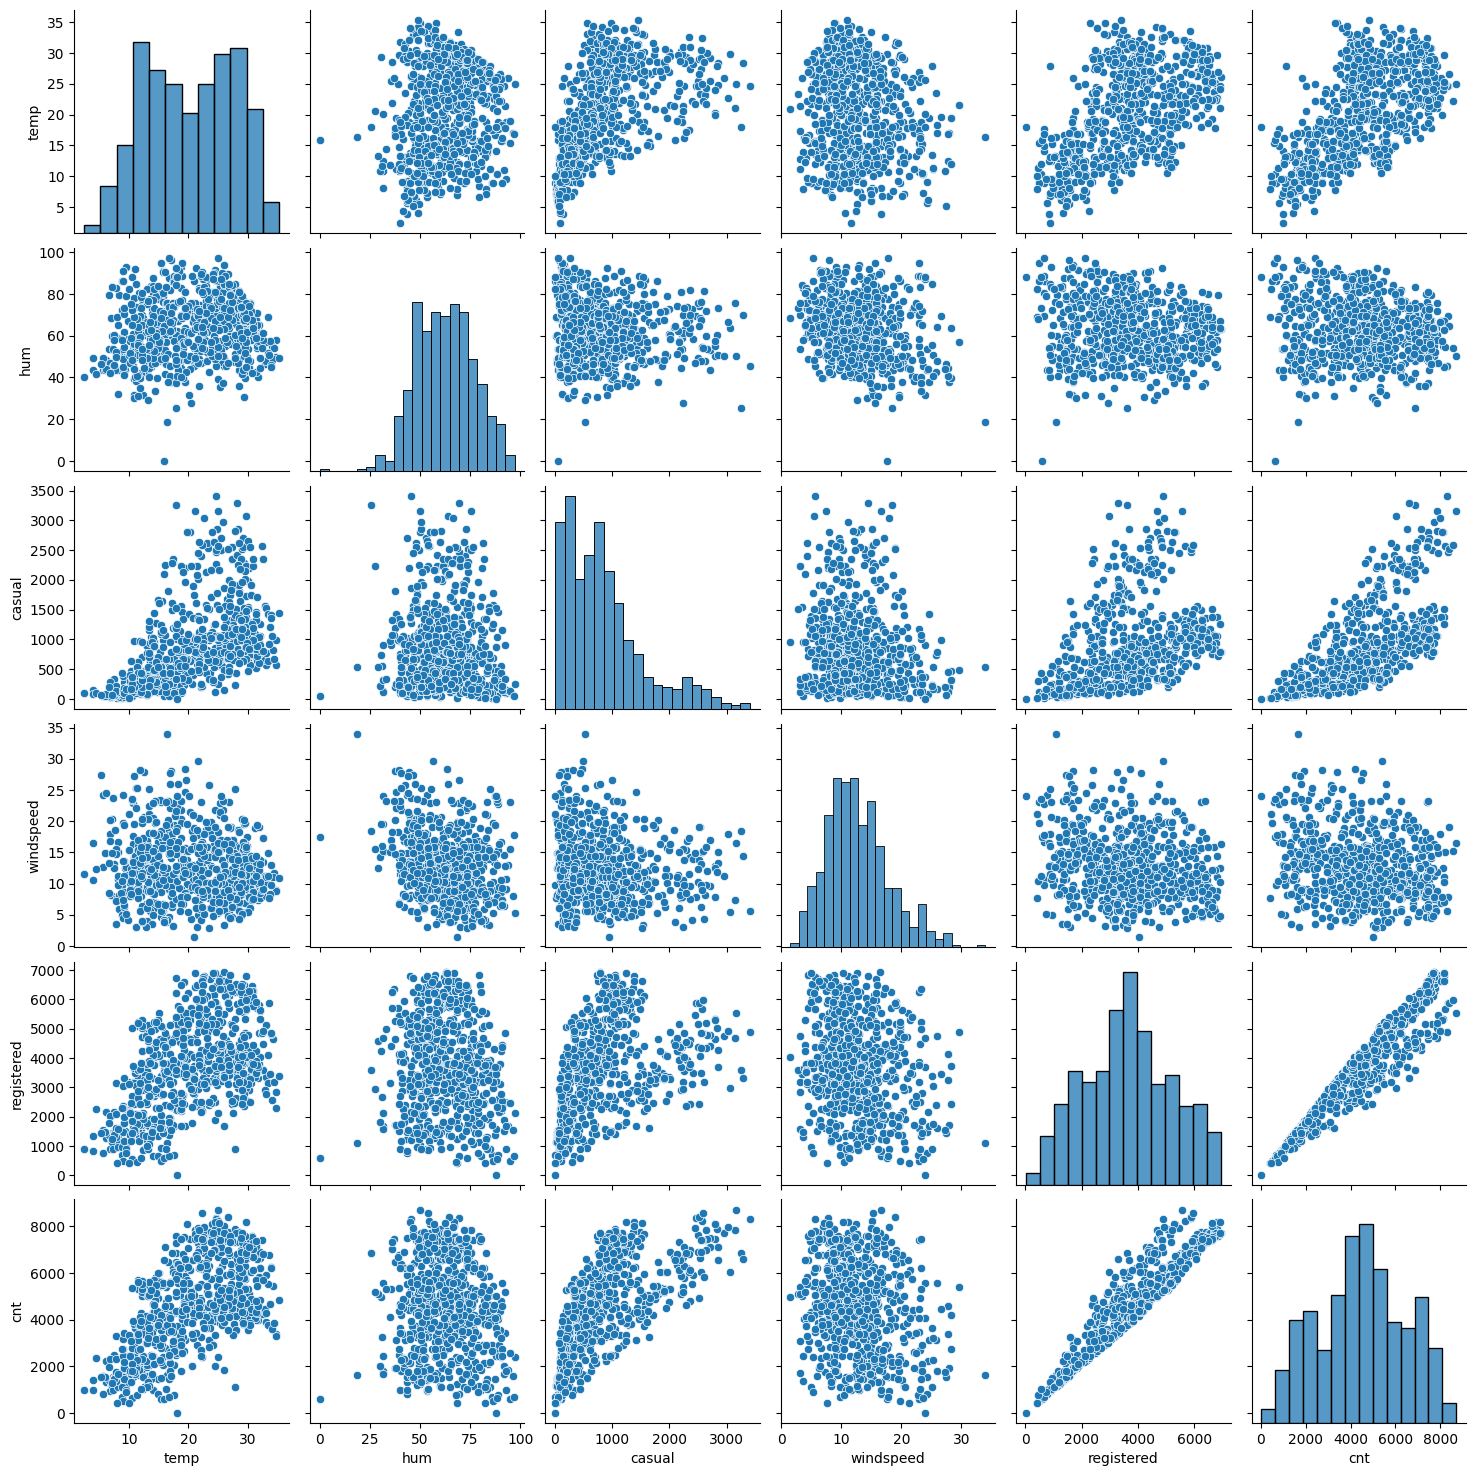

In [9]:
sns.pairplot(bikes, vars=['temp', 'hum','casual','windspeed','registered','cnt'])
plt.show()

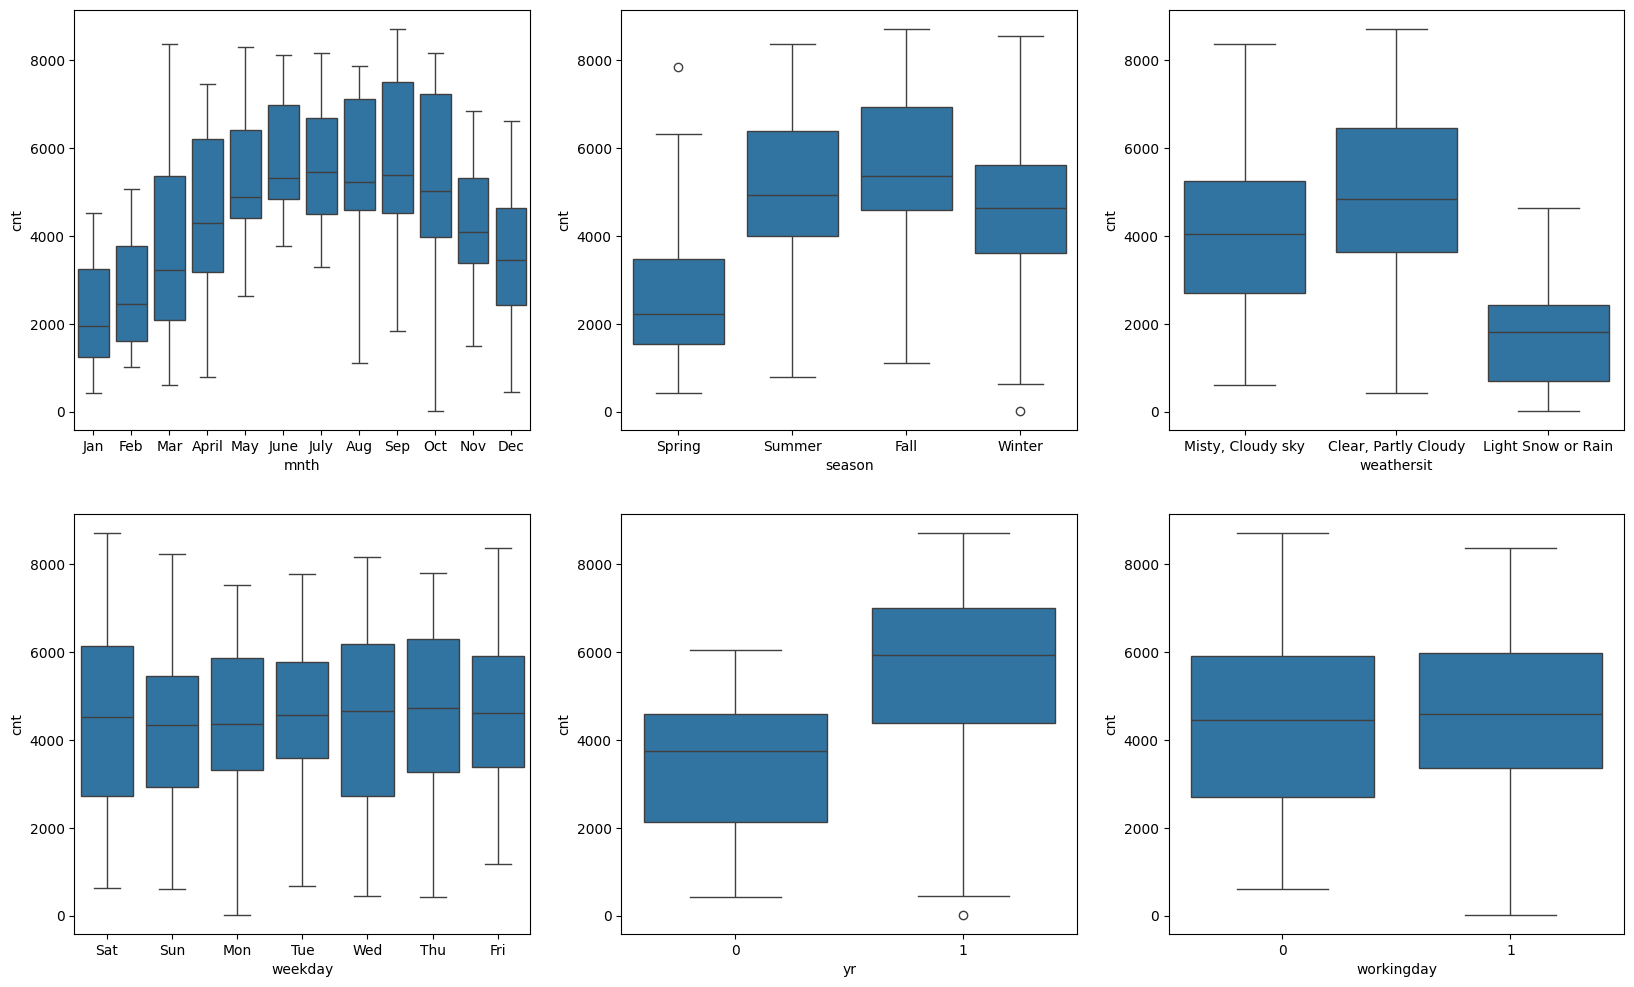

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.show()

## Step 3: Data Preparation

* We have a few categorical variables. Lets convert them using dummies.

In [11]:
mnth_dummy=pd.get_dummies(bikes['mnth'],drop_first=True)
season_dummy=pd.get_dummies(bikes['season'],drop_first=True)
weathersit_dummy=pd.get_dummies(bikes['weathersit'],drop_first=True)
weekday_dummy=pd.get_dummies(bikes['weekday'],drop_first=True)

mnth_dummy.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [12]:
# Concat with the data
bikes = pd.concat([bikes,mnth_dummy,season_dummy,weathersit_dummy,weekday_dummy],axis=1)

#Remove replaced data.
bikes.drop(['mnth','season','weathersit','weekday'], axis = 1, inplace = True)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   instant             730 non-null    int64  
 1   dteday              730 non-null    object 
 2   yr                  730 non-null    int64  
 3   holiday             730 non-null    int64  
 4   workingday          730 non-null    int64  
 5   temp                730 non-null    float64
 6   atemp               730 non-null    float64
 7   hum                 730 non-null    float64
 8   windspeed           730 non-null    float64
 9   casual              730 non-null    int64  
 10  registered          730 non-null    int64  
 11  cnt                 730 non-null    int64  
 12  Aug                 730 non-null    bool   
 13  Dec                 730 non-null    bool   
 14  Feb                 730 non-null    bool   
 15  Jan                 730 non-null    bool   
 16  July    

* Dropping columns that are not useful.

In [13]:
bikes.drop(['dteday','instant'], axis = 1, inplace = True)



bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Summer,Winter,Light Snow or Rain,"Misty, Cloudy sky",Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,False,False,False,True,False,True,False,False,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,False,False,False,True,False,False,True,False,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,False,False,False,False,True,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,False,False,False,False,False,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,False,False,False,False,False,False,False,False,False,True


In [14]:
varlist =  ['Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Spring', 'Summer', 'Winter',
       'Light Snow or Rain', 'Misty, Cloudy sky', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed']
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
bikes[varlist] = bikes[varlist].apply(binary_map)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Summer,Winter,Light Snow or Rain,"Misty, Cloudy sky",Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# Converting all the boolean to numeric

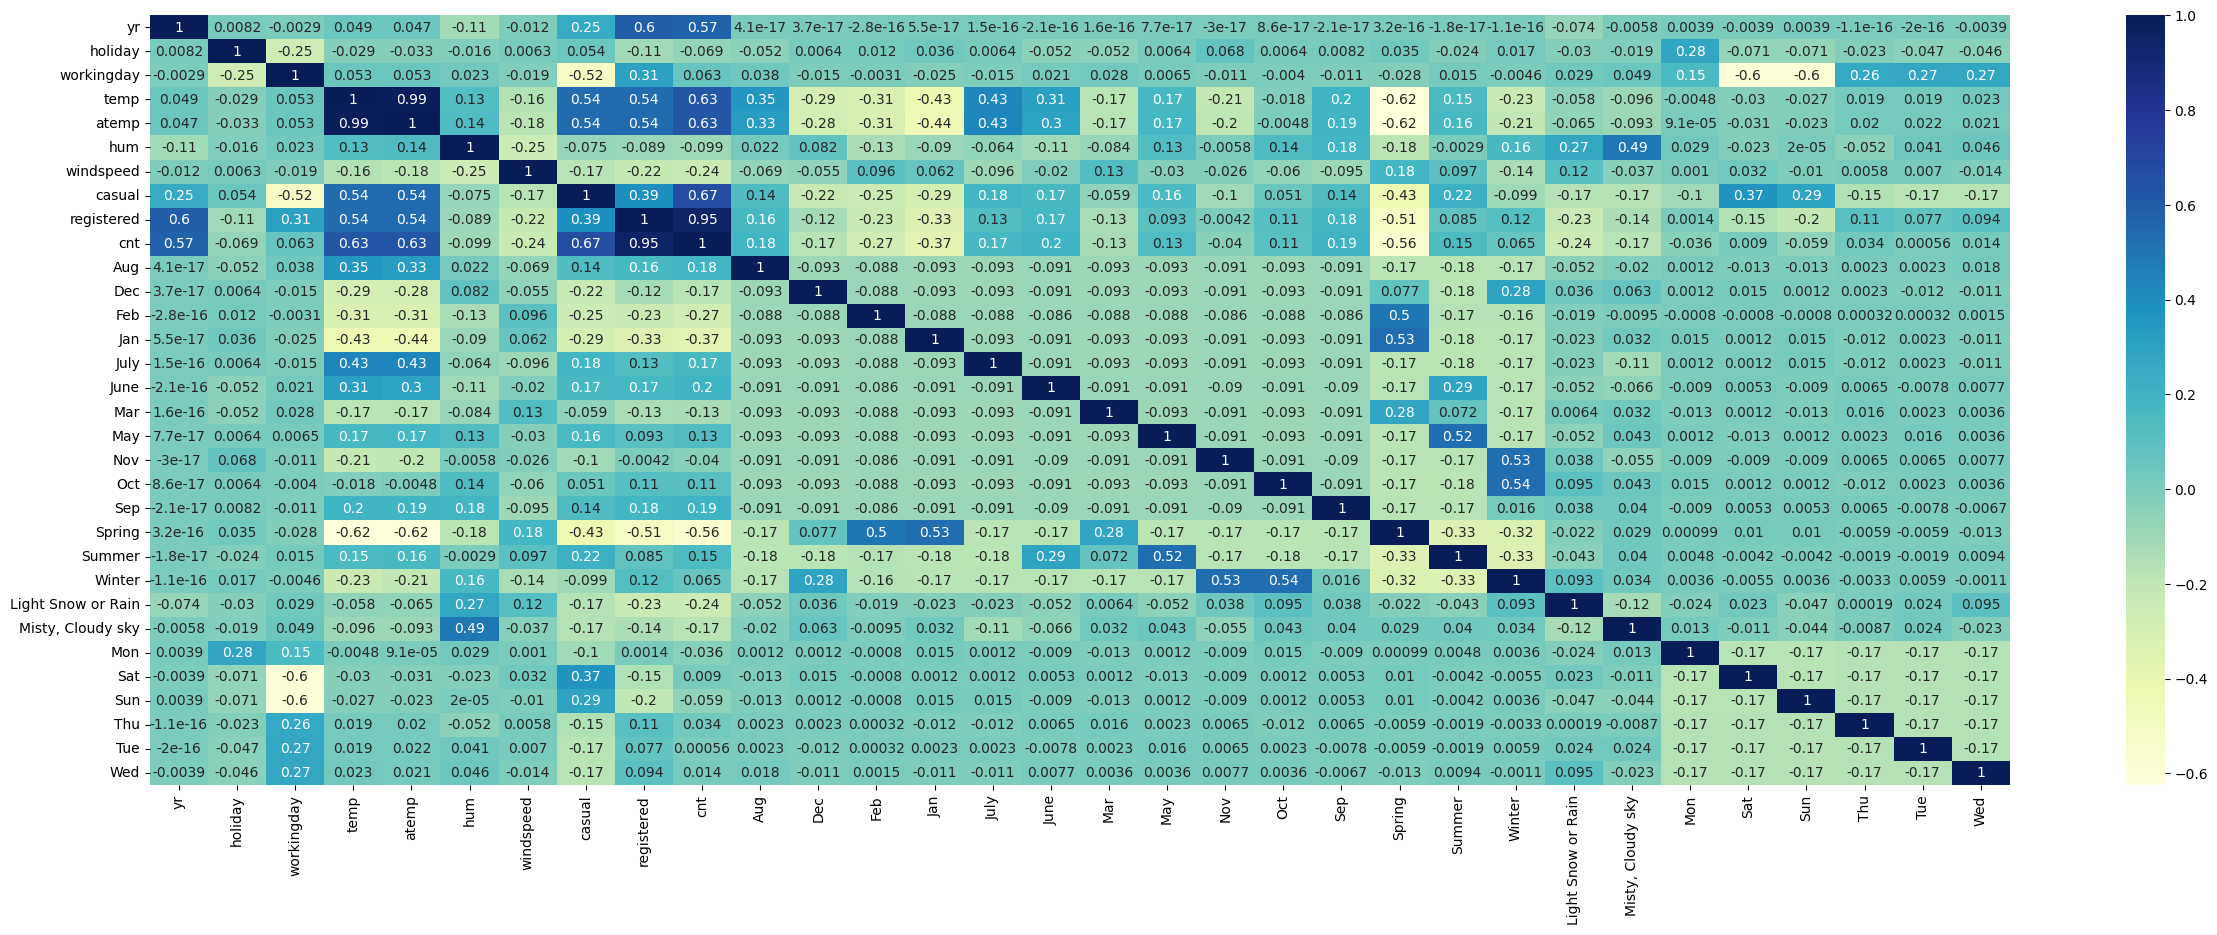

In [16]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 10))
sns.heatmap(bikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

Since temp and atemp are similar and highly correlated, we can drop one of them, dropping temp.

In [17]:
bikes.drop('temp', axis=1, inplace=True)

## Step 4: Splitting the Data into Training and Testing Sets

In [18]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt']
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,Aug,...,Summer,Winter,Light Snow or Rain,"Misty, Cloudy sky",Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.501133,0.575354,0.300794,922,6612,0.864243,0,...,0,1,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,968,6248,0.827658,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,956,3110,0.465255,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,364,1432,0.204096,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,1120,3100,0.482973,0,...,1,0,0,1,0,1,0,0,0,0


In [21]:
bikes_train.drop(['casual','registered'], axis = 1, inplace = True)
bikes_test.drop(['casual','registered'], axis = 1, inplace = True)

For our target variable cnt, we find high correlation with yr, tmp and atemp. Also, since atemp and temp are very highly correlated and almost explaining each other, dropping temp from the train and test sets.

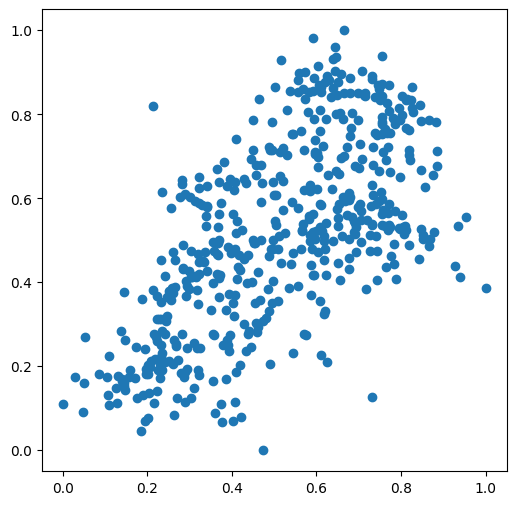

In [22]:
plt.figure(figsize=[6,6])
plt.scatter(bikes_train.atemp, bikes_train.cnt)
plt.show()

Since the correlation with atemp is hgih, we shall start our model with that.

# Dividing into X and Y sets for the model building


In [23]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

## Step 5: Building a linear model

In [24]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const    0.162924
atemp    0.683633
dtype: float64

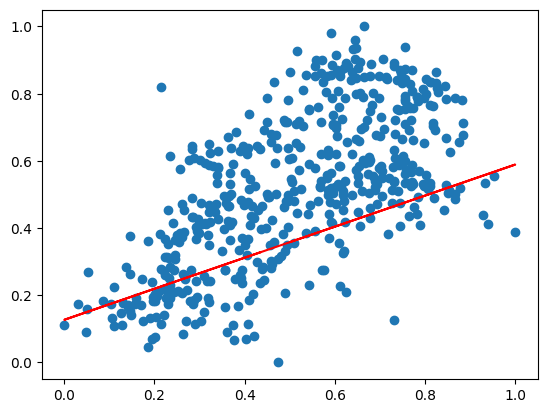

In [25]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [26]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.10e-61
Time:                        19:25:41   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

R-Squared is 0.418 which is a decent fit. And since there are more variables, lets add all and start removing the unfit ones instead of adding one by one.

In [27]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          4.12e-180
Time:                        19:25:41   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2617      0

* R-squared is 0.85. Some p-values indicate insignificance. Checking VIF to evaluate which columns to be dropped.

# RFE

In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 18
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select= 18)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 5),
 ('Mar', False, 11),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 3),
 ('Winter', True, 1),
 ('Light Snow or Rain', True, 1),
 ('Misty, Cloudy sky', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 9),
 ('Tue', False, 7),
 ('Wed', False, 8)]

In [29]:
# RFE Selected Variables

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Dec',
       'Feb', 'Jan', 'July', 'Nov', 'Sep', 'Spring', 'Winter',
       'Light Snow or Rain', 'Misty, Cloudy sky', 'Sat', 'Sun'],
      dtype='object')


#Building model using statsmodel, for the detailed statistics

In [30]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
# Creating X_test dataframe with RFE selected variables
def perform_ols(col):
  X_train_rfe = X_train[col]
  # Adding a constant variable.
  X_train_rfe = sm.add_constant(X_train_rfe)
  lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
  # Summary
  print(lm.summary())

def calculate_vif(X):
  vif = pd.DataFrame()
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif

In [32]:
perform_ols(col)
calculate_vif(X_train[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     161.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.65e-188
Time:                        19:25:42   Log-Likelihood:                 518.47
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2791      0

,Features,VIF
2,workingday,44.20
16,Sat,10.72
17,Sun,10.35
3,atemp,3.57
12,Spring,3.41
1,holiday,2.74
13,Winter,2.30
8,Jan,2.29
4,hum,1.92
7,Feb,1.83


Calculate VIF after dropping constant.

* Removing working day since it has a high VIF

In [33]:
col_new = col.drop('workingday')
perform_ols(col_new)
calculate_vif(X_train[col_new])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     161.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.65e-188
Time:                        19:25:42   Log-Likelihood:                 518.47
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3801      0

,Features,VIF
3,hum,25.87
2,atemp,17.37
11,Spring,4.09
4,windspeed,4.04
12,Winter,2.95
7,Jan,2.38
14,"Misty, Cloudy sky",2.29
0,yr,2.07
6,Feb,1.92
9,Nov,1.84


Hum has high VIF, removing it.

In [34]:
col_new = col_new.drop('hum')
perform_ols(col_new)
calculate_vif(X_train[col_new])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.3
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          8.39e-187
Time:                        19:25:42   Log-Likelihood:                 511.69
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     493   BIC:                            -917.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3107      0

,Features,VIF
2,atemp,4.74
3,windspeed,4.01
10,Spring,3.77
11,Winter,2.61
6,Jan,2.20
0,yr,2.06
5,Feb,1.88
8,Nov,1.81
4,Dec,1.55
13,"Misty, Cloudy sky",1.54


Now the VIF is less than 5 for all the variables and p-value is almost 0 for all except Sat, which has a p-value of 0.3 but since VIF is less, we can ignore it for now.

In [35]:
X_train_rfe = sm.add_constant(X_train[col_new])
lr= sm.OLS(y_train, X_train_rfe.astype(float)).fit()

## Residual Analysis of the train data

In [36]:
y_train_cnt = lr.predict(X_train_rfe)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

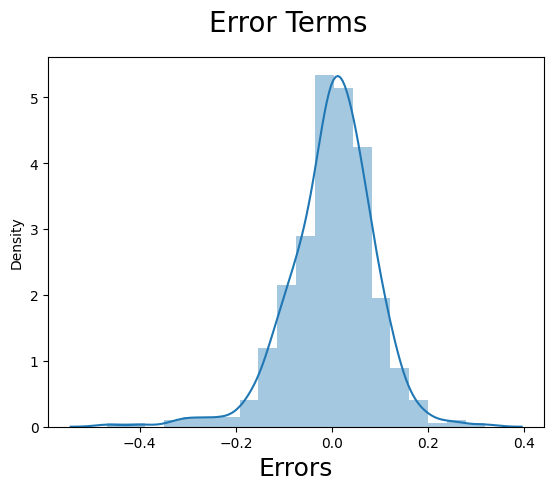

In [38]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

Error seems to be normally distributed mean around 0.

## Making Predictions

In [39]:
bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

In [40]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col_new]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [41]:
# Making predictions
y_pred = lr.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

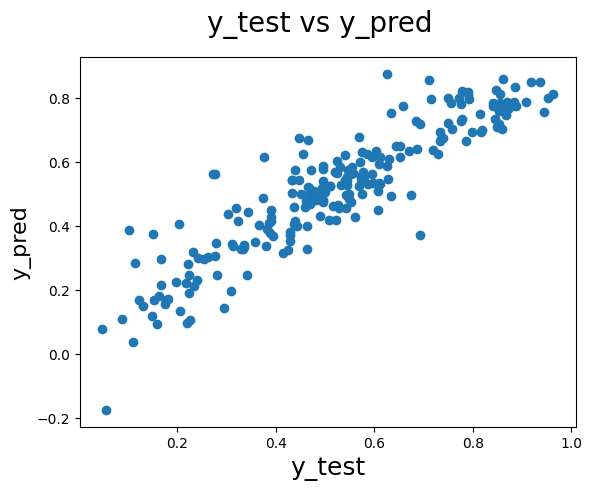

In [42]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Lets calculate the error distribution of y_pred and y_test.

Text(0.5, 0, 'Errors')

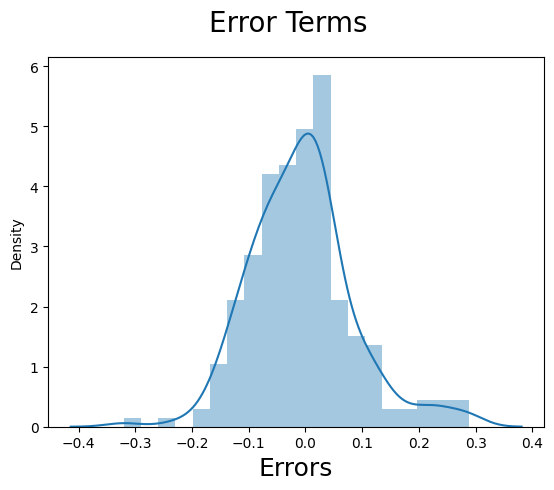

In [43]:
fig = plt.figure()
sns.distplot((y_pred - y_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

In [44]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true = y_test, y_pred = y_pred )
r2

0.8235119802246955

In [45]:
round(lr.params,3)

const                 0.311
yr                    0.236
holiday              -0.091
atemp                 0.394
windspeed            -0.146
Dec                  -0.066
Feb                  -0.043
Jan                  -0.080
July                 -0.055
Nov                  -0.056
Sep                   0.054
Spring               -0.093
Winter                0.062
Light Snow or Rain   -0.298
Misty, Cloudy sky    -0.084
Sat                   0.011
Sun                  -0.048
dtype: float64

In [46]:
adjusted_r2=1-(1-0.8235119802246955)*(16-1)/(16-1-1)
print(adjusted_r2)

0.8109056930978881


## Conclusion

* The linear regression params are as follows.

cnt = 0.311 +0.236*yr -0.091*holiday +0.384*atemp -0.146*windspeed -0.066*Dec -0.043*Feb -0.080*Jan -0.055*July -0.056*Nov +0.054*Sep -0.093*Spring +0.062*Winter -0.298*Light Snow or Rain -0.084*Misty, Cloudy sky +0.011*Sat-0.48*Sun

* R-squared of train set = 0.844
* R-squared adjusted of training set = 0.839
* R-squared of test set = 0.823
* R-squared adjusted of = 0.811


This shows our linear regression model is performant and can be used for predictions.